<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>
A Light Introduction to Python II<br><br><br>Week 2<br></p><br>


## Python program files

* Python code is usually stored in text files with the file ending "`.py`":

        myprogram.py

* Every line in a Python program file is assumed to be a Python statement, or part thereof. 

    * The only exception is comment lines, which start with the character `#` (optionally preceded by an arbitrary number of white-space characters, i.e., tabs or spaces). Comment lines are usually ignored by the Python interpreter.


* To run our Python program from the command line we use:

        $ python myprogram.py

#### Example:

* Make a file called "`hello_world.py`" consisting of the following single line of code
        print 'hello world!'
        
* Now execute it 

In [1]:
# To get the current working directory use

import os
os.getcwd()

'C:\\Users\\dzeng\\772 Programming for Data Analytics'

In [13]:
%matplotlib inline

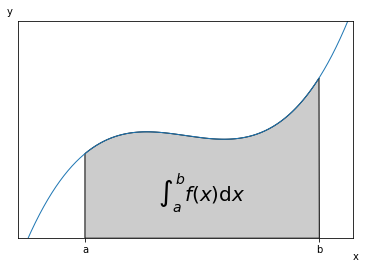

In [14]:
# %load myplot2.py
from pylab import *
from matplotlib.patches import Polygon

def func(x):
    return (x-3)*(x-5)*(x-7)+85

ax = subplot(111)

a, b = 2, 9 # integral area
x = arange(0, 10, 0.01)
y = func(x)
plot(x, y, linewidth=1)

# make the shaded region
ix = arange(a, b, 0.01)
iy = func(ix)
verts = [(a,0)] + list(zip(ix,iy)) + [(b,0)]
poly = Polygon(verts, facecolor='0.8', edgecolor='k')
ax.add_patch(poly)

text(0.5 * (a + b), 30,
     r"$\int_a^b f(x)\mathrm{d}x$", horizontalalignment='center',
     fontsize=20)

axis([0,10, 0, 180])
figtext(0.9, 0.05, 'x')
figtext(0.1, 0.9, 'y')
ax.set_xticks((a,b))
ax.set_xticklabels(('a','b'))
ax.set_yticks([])
show()

_(note that the '!' at the start of the input above is a special IPython "magic" operator. We'll talk more about that later)_

## Modules

Most of the functionality in Python is provided by *modules*. The Python Standard Library is a large collection of modules that provides *cross-platform* implementations of common facilities such as access to the operating system, file I/O, string management, network communication, and much more. For example, much of the functionality that we will use in this course will come from the `numpy`, `scipy`, and  `matplotlib` modules. We will discuss these modules in more detail later.

To use a module in a Python program it first has to be imported. A module can be imported using the `import` statement. For example, to import the module `math`, which contains many standard mathematical functions, we can do:

In [14]:
import math

help(math.log)

Help on built-in function log in module math:

log(...)
    log(x[, base])
    
    Return the logarithm of x to the given base.
    If the base not specified, returns the natural logarithm (base e) of x.



This includes the whole module and makes it available for use later in the program. For example, we can do:

In [3]:
import math

x = math.cos(2 * math.pi)

print(x)

1.0


If the module name is too long to type repeatedly, we can alias it onto a shorter namespace

In [4]:
import math as m

x = m.cos(2 * math.pi)

print(x)

1.0


Alternatively, we can chose to import all symbols (functions and variables) in a module to the current namespace (so that we don't need to use the prefix "`math.`" every time we use something from the `math` module:

In [5]:
from math import *

x = cos(2 * pi)

print(x)

1.0


This pattern can be very convenient, but in large programs that include many modules it is often a good idea to keep the symbols from each module in their own namespaces, by using the `import math` pattern. This would elminate potentially confusing problems with name space collisions _(a common problem with Matlab, which lacks namespaces)_.

As a third alternative, we can chose to import only a few selected symbols from a module by explicitly listing which ones we want to import instead of using the wildcard character `*`:

In [5]:
from math import cos, pi

x = cos(2 * pi)

print(x)

1.0


To get information about this module, you can type `help(math)` (this will generally give you a really long listing)
You can also get help for individual functions, e.g.:

In [7]:
help(math.cos)

Help on built-in function cos in module math:

cos(...)
    cos(x)
    
    Return the cosine of x (measured in radians).



In [7]:
help(math.sin)

Help on built-in function sin in module math:

sin(...)
    sin(x)
    
    Return the sine of x (measured in radians).



## Variables and types

### Symbol names 

Variable names in Python can contain alphanumerical characters `a-z`, `A-Z`, `0-9` and some special characters such as `_`. Normal variable names must start with a letter. 

By convention, variable names start with a lower-case letter, and Class names start with a capital letter. 

In addition, there are a number of Python keywords that cannot be used as variable names. These keywords are:

    and, as, assert, break, class, continue, def, del, elif, else, except, 
    exec, finally, for, from, global, if, import, in, is, lambda, not, or,
    pass, print, raise, return, try, while, with, yield

Note: Be aware of the keyword `lambda`, which could easily be a natural variable name in a scientific program. But being a keyword, it cannot be used as a variable name.

### Assignment

The assignment operator in Python is `=`. Python is a dynamically typed language, so we do not need to specify the type of a variable when we create one.

Assigning a value to a new variable creates the variable:

In [15]:
# variable assignments
x = 1.0
x = 1
my_variable = 12.2

Although not explicitly specified, a variable does have a type associated with it. The type is derived form the value it was assigned.

In [16]:
type(x)

int

If you're accustomed to Matlab, this means you'll have to be a bit more careful about integer versus floating-point types. E.g.,

In [10]:
x = 3
x/2

1

versus

In [22]:
x = 5.0**100+100

y = 5.0**100

x,y

(7.888609052210118e+69, 7.888609052210118e+69)

## Operators and comparisons

Most operators and comparisons in Python work as one would expect:

* Arithmetic operators `+`, `-`, `*`, `/`, `//` (integer division), '**' power


_Note that the power differs from the `^` used in Matlab. E.g,_



In [12]:
2**4

16

* The boolean operators are spelled out as words `and`, `not`, `or`. 


E.g,

In [23]:
True or not False

type(True)

bool

* Comparison operators `>`, `<`, `>=` (greater or equal), `<=` (less or equal), `==` equality, `!=` (not equal), `is` identical.

## Compound types: Strings, List and dictionaries

### Strings

Strings are the variable type that is used for storing text messages. Unlike Matlab, Python has a _bona fide_ string type.

In [14]:
# Note that either single or double quotes can be used. E.g.,
string1 = 'Hello '
string2 = "World!"
# and you can concatenate strings using the addition operator
string1+string2

'Hello World!'

Strings can also be treated as lists of characters. In fact, there are a bunch of really useful string functions built into Python. I don't have time to enumerate them here, but I encourage you to look them up. 

One important feature of strings (that will be useful for generating plot labels later) is the ability to use string formatting (similar to c-string formatting). E.g.,

In [6]:
# in the text below, the '%.4f' is a placeholder for the formatted number and the digit after the decimal tells 
# the formatter how many decimal places to display  
float_string = 'pi = %.4f' % pi

float_string[-1]

'6'

### List

Lists are very similar to strings, except that each element can be of any type.

The syntax for creating lists in Python is `[...]`:

In [25]:
list1 = [1,2,3,4]

print(type(list1))
print(list1)

<type 'list'>
[1, 2, 3, 4]


We can use indexing and slice operations similar to those in Matlab to operate on lists.

In [26]:
list1[0:3]

[1, 2, 3]

In [18]:
list1[0:3]

[1, 2, 3]

<font color="red",size="3">**Heads up MATLAB users:**</font> you should note three important features of Python indexing and slice operations

1. The indexing operator consists of square brackets `[]` rather than parentheses
2. As in most programming languages (but unlike in Matlab), indexing starts at 0
3. In the slicing operation, the final parameter (e.g., the 3 above) indicates one place _past_ the last desired index


**Additional features of python list slicing & indexing:**

* you can leave off the first index if you want to start from the front of the list



In [19]:
list1[:3]

[1, 2, 3]

* you can leave off the last index if you want all values until the end of the list

In [20]:
list1[2:]

[3, 4]

* you can index a list backwards using negative numbers

E.g, to get the last 3 values of a list, regardless of its length

In [21]:
list1[-3:]

[2, 3, 4]

An important feature of lists is that they can hold any other Python types, including functions, objects, even other lists

In [27]:
list_list = [list1,list1]

print(list_list)

[[1, 2, 3, 4], [1, 2, 3, 4]]


In fact, the objects in a single list don't even need to be of the same type

In [23]:
crazy_list = [1,2.0,'what?',list_list]

print(crazy_list)

[1, 2.0, 'what?', [[1, 2, 3, 4], [1, 2, 3, 4]]]


Lists play a very important role in Python, and are for example used in loops and other flow control structures (discussed below). There are number of convenient functions for generating lists of various types, for example the `range` function:

In [36]:
start = 10
stop = 30
step = 2

#range(start, stop, step)

rlist = range(10,21,2)
rlist.append('t')
print(rlist)

[10, 12, 14, 16, 18, 20, 't']


#### Adding, inserting, modifying, and removing elements from lists


In [25]:
# create a new empty list
l = []

# add an elements using `append`
l.append("A")
l.append("d")
l.append("d")

print(l)

['A', 'd', 'd']


In [26]:
# modify individual list elements through indexing

l[1] = "p"
l[2] = "p"

print(l)

['A', 'p', 'p']


In [27]:
# insert elements at specific indices

l.insert(0, "i")
l.insert(1, "n")
l.insert(2, "s")
l.insert(3, "e")
l.insert(4, "r")
l.insert(5, "t")

print(l)

['i', 'n', 's', 'e', 'r', 't', 'A', 'p', 'p']


In [28]:
# remove first element with specific value

l.remove("A")

print(l)

['i', 'n', 's', 'e', 'r', 't', 'p', 'p']


In [29]:
# delete elements at specific locations

del l[7]
del l[6]

print(l)

['i', 'n', 's', 'e', 'r', 't']


### Tuples

Tuples are like lists, except that they cannot be modified once created, that is they are *immutable*. 

In Python, tuples are created using the syntax `(..., ..., ...)`, or even `..., ...`:

In [8]:
point = (10, 20)

print(type(point))
print(point)

<type 'tuple'>
(10, 20)


We can unpack a tuple by assigning it to a comma-separated list of variables:

In [9]:
x, y = point

print("x =", x)
print("y =", y)

a,b,c = (1,2,3);

('x =', 10)
('y =', 20)


### Dictionaries

Dictionaries are also like lists, except that each element is a key-value pair. The syntax for dictionaries is `{key1 : value1, ...}`:

In [32]:
params = {"parameter1" : 1.0,
          "parameter2" : 2.0,
          "parameter3" : 3.0,}

print(type(params))
print(params)

<type 'dict'>
{'parameter1': 1.0, 'parameter3': 3.0, 'parameter2': 2.0}


In [33]:
# add a new entry
params["parameter4"] = "D"

print(params)

{'parameter4': 'D', 'parameter1': 1.0, 'parameter3': 3.0, 'parameter2': 2.0}


## Control Flow

### Conditional statements: if, elif, else

The Python syntax for conditional execution of code use the keywords `if`, `elif` (else if), `else`:

In [38]:
statement1 = False
statement2 = False

if statement1:
    print("statement1 is True")
    
elif statement2:
    print("statement2 is True")
    
else:
    print("statement1 and statement2 are False")

statement1 and statement2 are False


For the first time, here we encounted a peculiar and unusual aspect of the Python programming language: 

   **_Program blocks are defined by their indentation level._** 

That is, instead of using the `end` keyword (as in Matlab) or curly braces `{}` (as in C and Java), Python uses the level of indentation (white space before the code statements) to indicate the extent of a code block

This means that we have to be careful to indent our code correctly, or else we will get syntax errors or code that does not do what we mean it to do. 

**Examples:**

In [35]:
statement1 = statement2 = True

# appropriate indentation
if statement1:
    if statement2:
        print("both statement1 and statement2 are True")

both statement1 and statement2 are True


In [36]:
# Bad indentation!
if statement1:
    if statement2:
    print("both statement1 and statement2 are True")  # this line is not properly indented

IndentationError: expected an indented block (<ipython-input-36-78979cdecf37>, line 4)

In [ ]:
statement1 = False 

if statement1:
    print("printed if statement1 is True")
    
    print("still inside the if block")

In [ ]:
if statement1:
    print("printed if statement1 is True")
    
print("now outside the if block")

## Loops

In Python, loops can be programmed in a number of different ways. The most common is the `for` loop, which is used together with iterable objects, such as lists. The basic syntax is:


**`for` loops**:

In [39]:
for x in [1,2,3]:
    print(x)

1
2
3


In [40]:
i = 1;
while(i<4):
    print(i)
    i = i + 1

1
2
3


The `for` loop iterates over the elements of the supplied list, and executes the containing block once for each element. Any kind of list can be used in the `for` loop. For example:

In [ ]:
for x in range(4): # by default range start at 0
    print(x)

In [11]:
for i,word in zip(arange(0,4),["scientific", "computing", "with", "python"]):
    print(i);
    print(word)

0
scientific
1
computing
2
with
3
python


**List comprehensions: Creating lists using `for` loops**:

A convenient and compact way to initialize lists:

In [41]:
numlist = range(0,5) # list of integers 0-4

squaredlist = [];

for num in numlist:
    squaredlist.append(num**2);
    
print(squaredlist)


[0, 1, 4, 9, 16]


In [43]:
squaredlist2 = [num**2 for num in numlist]

print(squaredlist2)

[0, 1, 4, 9, 16]


## Functions

A function in Python is defined using the keyword `def`, followed by a function name, a signature within parentheses `()`, and a colon `:`. The following code, with one additional level of indentation, is the function body.

In [39]:
# define the function
def cube(val):
    # you must include a return statement if you want to return a result
    return val**3

# now call the function
cube(2)

8

We can return multiple values from a function using tuples (see above):

In [12]:
def square_and_cube(val):
    return val**2,val**3

square,cube = square_and_cube(2)

print('square = %d'%square) # the %d is the string format indicator for a signed integer type
print('cube = %d'%cube)

[square_and_cube(el) for el in range(4)]

square = 4
cube = 8


[(0, 0), (1, 1), (4, 8), (9, 27)]

### Default argument and keyword arguments

In a definition of a function, we can give default values to the arguments the function takes:

In [45]:
def raise_to_power(val,exponent=2):
    return val**exponent;

print(raise_to_power(2,3))
print(raise_to_power(2,exponent=3))

print(raise_to_power(2,4)) # uses the provided exponent argument
print(raise_to_power(2)) # uses the default exponent argument (2)

8
8
16
4


### Unnamed functions (lambda function)

In Python we can also create unnamed functions, using the `lambda` keyword:

In [42]:
f1 = lambda x: x**2
    
# is equivalent to 

def f2(x):
    return x**2

# to check, call them both
f1(2), f2(2)

(4, 4)

These lambda functions are useful when we need to pass small functions around as arguments (e.g., in optimization routines)

## Classes

Classes are the key features of object-oriented programming. A class is a structure for representing an object and the operations that can be performed on the object. 

In Python a class can contain *attributes* (variables) and *methods* (functions).

A class is defined almost like a function, but using the `class` keyword, and the class definition usually contains a number of class method definitions (a function in a class).

* Each class method should have an argument `self` as it first argument. This object is a self-reference.

* Some class method names have special meaning, for example:

    * `__init__`: The name of the method that is invoked when the object is first created.
    * `__str__` : A method that is invoked when a simple string representation of the class is needed, as for example when printed.
    * There are many more, see <http://docs.python.org/2/reference/datamodel.html#special-method-names>

In [43]:
class Point:
    """
    Simple class for representing a point in a Cartesian coordinate system.
    """
    
    def __init__(self, x, y):
        """
        Create a new Point at x, y.
        """
        self.x = x
        self.y = y
        
    def translate(self, dx, dy):
        """
        Translate the point by dx and dy in the x and y direction.
        """
        self.x += dx
        self.y += dy
        
    def __str__(self):
        return("Point at [%f, %f]" % (self.x, self.y))

To create a new instance of a class:

In [44]:
p1 = Point(0, 0) # this will invoke the __init__ method in the Point class

print(p1)         # this will invode the __str__ method

Point at [0.000000, 0.000000]


To invoke a class method in the class instance `p`:

In [45]:
p2 = Point(1, 1)

p1.translate(0.25, 1.5)

print(p1)
print(p2)

Point at [0.250000, 1.500000]
Point at [1.000000, 1.000000]
